##1.Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen pueden ser predictivas de la desocupación y seria útil incluir para perfeccionar el ejercicio del TP3? Mencionen estas variables y justifiquen su elección.



REGION (Región geográfica del hogar): Captura diferencias geográficas significativas en tasas de desempleo, relacionadas con el desarrollo económico local y acceso a oportunidades laborales.

II7 (Tenencia de la vivienda): Refleja estabilidad económica del hogar. Hogares que alquilan pueden estar más presionados económicamente, mientras que aquellos que son propietarios pueden tener más estabilidad.

CH03 (Relación de parentesco con el jefe de hogar): La relación con el jefe de hogar puede influir en la probabilidad de empleo o desempleo, ya que ciertos roles en la familia (como jefe o cónyuge) podrían tener mayores prioridades o responsabilidades económicas.

IV12_3 (Ubicación en villa de emergencia): Refleja una condición de vulnerabilidad socioeconómica que puede limitar el acceso a oportunidades laborales y recursos.

IV6 (Acceso al agua): El acceso al agua (por cañería, fuera del terreno, etc.) indica diferencias en las condiciones materiales del hogar, que podrían correlacionarse con el nivel de ingresos y empleo.

IV11 (Desagüe del baño): El tipo de desagüe refleja el nivel de infraestructura y calidad de vida del hogar, indicadores que pueden influir en la estabilidad laboral.

II8 (Tipo de combustible utilizado para cocinar): Hogares que utilizan gas de red tienen mejor infraestructura en comparación con aquellos que dependen de kerosene, leña o carbón, lo que puede relacionarse con el ingreso y empleo.

CH12 (Nivel educativo más alto alcanzado): La educación es un factor determinante en el acceso al empleo. Los niveles educativos más altos (universitario o posgrado) están directamente relacionados con mejores oportunidades laborales y menores tasas de desempleo.

ITF (Ingreso total familiar): Proporciona una medida global del ingreso familiar, relevante para evaluar la situación económica general del hogar y su relación con el empleo.

IPCF (Ingreso per cápita familiar): Permite evaluar la disponibilidad de recursos económicos por persona en el hogar, siendo un indicador clave de bienestar económico y estabilidad.

##2.Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls, respectivamente. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciuidad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.


In [ ]:
!pip install pyreadstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.0 MB/s eta 0:00:00


In [ ]:
import pyreadstat
import pandas as pd
import requests

# URLs de los archivos
url_2004 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/main/TP4/Hogar_t104.dta"
url_2024 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/main/TP4/usu_hogar_T124.xlsx"

# Descargar y guardar los archivos localmente
file_2004 = "Hogar_t104.dta"
file_2024 = "usu_hogar_T124.xlsx"

# Descargar archivo 2004
response_2004 = requests.get(url_2004)
with open(file_2004, "wb") as f:
    f.write(response_2004.content)

# Descargar archivo 2024
response_2024 = requests.get(url_2024)
with open(file_2024, "wb") as f:
    f.write(response_2024.content)

# Cargar las bases de hogares para 2004 y 2024 usando pyreadstat y pandas
hogar_2004, meta_2004 = pyreadstat.read_dta(file_2004)
hogar_2024 = pd.read_excel(file_2024)

# Estandarizar los nombres de las columnas
hogar_2004.columns = [col.upper() for col in hogar_2004.columns]
hogar_2024.columns = [col.upper() for col in hogar_2024.columns]

# URLs directas de los archivos en GitHub
url_i_2004 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/Individual_t104.dta"
url_i_2024 = "https://github.com/JorgeJimenezT/Big-Data-UBA---Jimenez-Menendez-Nunez/raw/refs/heads/main/TP3/usu_individual_T124.xlsx"

# Leer los archivos directamente desde GitHub
individual_2004 = pd.read_stata(url_i_2004)
individual_2024 = pd.read_excel(url_i_2024)

# Estandarizar los nombres de las columnas en los DataFrames individuales
individual_2004.columns = [col.upper() for col in individual_2004.columns]
individual_2024.columns = [col.upper() for col in individual_2024.columns]

individual_2004['YEAR'] = 2004
individual_2024['YEAR'] = 2024

hogar_2004['YEAR'] = 2004
hogar_2024['YEAR'] = 2024



In [ ]:
import pyreadstat
import pandas as pd
import requests


# Diccionarios de mapeo para las variables V8 - V19_B
v8_mapping = {1: "Sí - Alquiler", 2: "No - Alquiler"}
v9_mapping = {1: "Sí - Ganancias de negocio", 2: "No - Ganancias de negocio"}
v10_mapping = {1: "Sí - Intereses/rentas", 2: "No - Intereses/rentas"}
v11_mapping = {1: "Sí - Beca de estudio", 2: "No - Beca de estudio"}
v12_mapping = {1: "Sí - Cuotas de alimentos/ayuda", 2: "No - Cuotas de alimentos/ayuda"}
v13_mapping = {1: "Sí - Gastar ahorros", 2: "No - Gastar ahorros"}
v14_mapping = {1: "Sí - Préstamos familiares/amigos", 2: "No - Préstamos familiares/amigos"}
v15_mapping = {1: "Sí - Préstamos bancos/financieras", 2: "No - Préstamos bancos/financieras"}
v16_mapping = {1: "Sí - Compran a crédito/fiado", 2: "No - Compran a crédito/fiado"}
v17_mapping = {1: "Sí - Vender pertenencias", 2: "No - Vender pertenencias"}
v18_mapping = {1: "Sí - Otros ingresos", 2: "No - Otros ingresos"}
v19_a_mapping = {1: "Sí - Menores ayudan trabajando", 2: "No - Menores ayudan trabajando"}
v19_b_mapping = {1: "Sí - Menores ayudan pidiendo", 2: "No - Menores ayudan pidiendo"}

# Aplicar los reemplazos en hogar_2004
hogar_2004['V8'] = hogar_2004['V8'].replace(v8_mapping)
hogar_2004['V9'] = hogar_2004['V9'].replace(v9_mapping)
hogar_2004['V10'] = hogar_2004['V10'].replace(v10_mapping)
hogar_2004['V11'] = hogar_2004['V11'].replace(v11_mapping)
hogar_2004['V12'] = hogar_2004['V12'].replace(v12_mapping)
hogar_2004['V13'] = hogar_2004['V13'].replace(v13_mapping)
hogar_2004['V14'] = hogar_2004['V14'].replace(v14_mapping)
hogar_2004['V15'] = hogar_2004['V15'].replace(v15_mapping)
hogar_2004['V16'] = hogar_2004['V16'].replace(v16_mapping)
hogar_2004['V17'] = hogar_2004['V17'].replace(v17_mapping)
hogar_2004['V18'] = hogar_2004['V18'].replace(v18_mapping)
hogar_2004['V19_A'] = hogar_2004['V19_A'].replace(v19_a_mapping)
hogar_2004['V19_B'] = hogar_2004['V19_B'].replace(v19_b_mapping)

# Aplicar los reemplazos en hogar_2024
hogar_2024['V8'] = hogar_2024['V8'].replace(v8_mapping)
hogar_2024['V9'] = hogar_2024['V9'].replace(v9_mapping)
hogar_2024['V10'] = hogar_2024['V10'].replace(v10_mapping)
hogar_2024['V11'] = hogar_2024['V11'].replace(v11_mapping)
hogar_2024['V12'] = hogar_2024['V12'].replace(v12_mapping)
hogar_2024['V13'] = hogar_2024['V13'].replace(v13_mapping)
hogar_2024['V14'] = hogar_2024['V14'].replace(v14_mapping)
hogar_2024['V15'] = hogar_2024['V15'].replace(v15_mapping)
hogar_2024['V16'] = hogar_2024['V16'].replace(v16_mapping)
hogar_2024['V17'] = hogar_2024['V17'].replace(v17_mapping)
hogar_2024['V18'] = hogar_2024['V18'].replace(v18_mapping)
hogar_2024['V19_A'] = hogar_2024['V19_A'].replace(v19_a_mapping)
hogar_2024['V19_B'] = hogar_2024['V19_B'].replace(v19_b_mapping)

# Diccionario de mapeo para la variable CH04 (Sexo)
ch04_mapping = {1: "Varón", 2: "Mujer"}

# Aplicar el reemplazo en la variable CH04
individual_2004['CH04'] = individual_2004['CH04'].replace(ch04_mapping)
individual_2024['CH04'] = individual_2024['CH04'].replace(ch04_mapping)

# Diccionario de mapeo para la variable II7 (Régimen de tenencia)
ii7_mapping = {
    1: "Propietario de la vivienda y el terreno",
    2: "Propietario de la vivienda solamente",
    3: "Inquilino/arrendatario de la vivienda",
    4: "Ocupante por pago de impuestos/expensas",
    5: "Ocupante en relación de dependencia",
    6: "Ocupante gratuito (con permiso)",
    7: "Ocupante de hecho (sin permiso)",
    8: "Está en sucesión"
}

# Aplicar el reemplazo en la variable II7
hogar_2004['II7'] = hogar_2004['II7'].replace(ii7_mapping)
hogar_2024['II7'] = hogar_2024['II7'].replace(ii7_mapping)


# Diccionario de mapeo para la variable CH03 (Relación de parentesco)
ch03_mapping = {
    1: "Jefe/a",
    2: "Cónyuge/pareja",
    3: "Hijo/hijastra",
    4: "Yerno/nuera",
    5: "Nieto/a",
    6: "Madre/padre",
    7: "Suegro/a",
    8: "Hermano/a",
    9: "Otros familiares",
    10: "No familiares"
}

# Aplicar el reemplazo en la variable CH03
individual_2004['CH03'] = individual_2004['CH03'].replace(ch03_mapping)
individual_2024['CH03'] = individual_2024['CH03'].replace(ch03_mapping)


# Diccionario de mapeo: nombres a códigos
aglomerado_mapping = {
    "Gran La Plata": 2,
    "Bahía Blanca - Cerri": 3,
    "Gran Rosario": 4,
    "Gran Santa Fe": 5,
    "Gran Paraná": 6,
    "Posadas": 7,
    "Gran Resistencia": 8,
    "Cdro. Rivadavia – Rada Tilly": 9,
    "Gran Mendoza": 10,
    "Corrientes": 12,
    "Gran Córdoba": 13,
    "Concordia": 14,
    "Formosa": 15,
    "Neuquén – Plottier": 17,
    "S.del Estero - La Banda": 18,
    "Jujuy - Palpalá": 19,
    "Río Gallegos": 20,
    "Gran Catamarca": 22,
    "Salta": 23,
    "La Rioja": 25,
    "San Luis - El Chorrillo": 26,
    "Gran San Juan": 27,
    "Gran Tucumán - T. Viejo": 29,
    "Santa Rosa - Toay": 30,
    "Ushuaia - Río Grande": 31,
    "Ciudad de Buenos Aires": 32,
    "Partidos del GBA": 33,
    "Mar del Plata - Batán": 34,
    "Río Cuarto": 36
}

# Reemplazar nombres por códigos en la columna 'AGLOMERADO'
hogar_2004['AGLOMERADO'] = hogar_2004['AGLOMERADO'].replace(aglomerado_mapping)
hogar_2024['AGLOMERADO'] = hogar_2024['AGLOMERADO'].replace(aglomerado_mapping)

estado_mapping = {
    0: "Entrevista no realizada",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"
}

# Reemplazar códigos numéricos por sus etiquetas correspondientes en la columna 'ESTADO'
individual_2024['ESTADO'] = individual_2024['ESTADO'].replace(estado_mapping)


# Diccionario de mapeo para la variable II8 (Combustible utilizado para cocinar)
ii8_mapping = {
    1: "Gas de red",
    2: "Gas de tubo/garrafa",
    3: "Kerosene/leña/carbón"
}

# Aplicar el reemplazo en la variable II8
hogar_2004['II8'] = hogar_2004['II8'].replace(ii8_mapping)
hogar_2024['II8'] = hogar_2024['II8'].replace(ii8_mapping)


# Diccionario de mapeo: códigos de NIVEL_ED a sus etiquetas
nivel_ed_mapping_inverso = {
    "Primaria Incompleta": 1,
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción": 7,
    "Ns./Nr.": 9
}

# Reemplazar valores en la columna 'NIVEL_ED' con sus códigos numéricos
individual_2004['NIVEL_ED'] = individual_2004['NIVEL_ED'].replace(nivel_ed_mapping_inverso)




# Filtrar aglomerados correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires
ciudad_aglomerados = [32, 33]

hogar_2004_filtered = hogar_2004[hogar_2004["AGLOMERADO"].isin(ciudad_aglomerados)]
hogar_2024_filtered = hogar_2024[hogar_2024["AGLOMERADO"].isin(ciudad_aglomerados)]

individual_2004_filtered = individual_2004[individual_2004["AGLOMERADO"].isin(ciudad_aglomerados)]
individual_2024_filtered = individual_2024[individual_2024["AGLOMERADO"].isin(ciudad_aglomerados)]

individual_2024_filtered.to_csv("individual_2024_filtered.csv", index=False)
hogar_2024_filtered.to_csv("hogar_2024_filtered.csv", index=False)

# Diagnóstico de las claves antes del merge
print("Diagnóstico antes del merge:")
print("Valores únicos en 'CODUSU' y 'NRO_HOGAR' en hogar_2004:", hogar_2004_filtered[["CODUSU", "NRO_HOGAR"]].nunique())
print("Valores únicos en 'CODUSU' y 'NRO_HOGAR' en individual_2004:", individual_2004[["CODUSU", "NRO_HOGAR"]].nunique())

print("Valores únicos en 'CODUSU' y 'NRO_HOGAR' en hogar_2024:", hogar_2024_filtered[["CODUSU", "NRO_HOGAR"]].nunique())
print("Valores únicos en 'CODUSU' y 'NRO_HOGAR' en individual_2024:", individual_2024[["CODUSU", "NRO_HOGAR"]].nunique())



<ipython-input-3-5ee7d72e6116>:169: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  individual_2004['NIVEL_ED'] = individual_2004['NIVEL_ED'].replace(nivel_ed_mapping_inverso)
<ipython-input-3-5ee7d72e6116>:169: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  individual_2004['NIVEL_ED'] = individual_2004['NIVEL_ED'].replace(nivel_ed_mapping_inverso)


Diagnóstico antes del merge:
Valores únicos en 'CODUSU' y 'NRO_HOGAR' en hogar_2004: CODUSU       2329
NRO_HOGAR       3
dtype: int64
Valores únicos en 'CODUSU' y 'NRO_HOGAR' en individual_2004: CODUSU       12597
NRO_HOGAR        6
dtype: int64
Valores únicos en 'CODUSU' y 'NRO_HOGAR' en hogar_2024: CODUSU       2540
NRO_HOGAR       4
dtype: int64
Valores únicos en 'CODUSU' y 'NRO_HOGAR' en individual_2024: CODUSU       16005
NRO_HOGAR        5
dtype: int64


In [ ]:
import pandas as pd

# Definir las columnas relevantes para hogares e individuales
columnas_hogar = ["CODUSU", "NRO_HOGAR", "REGION", "II7", "IV12_3", "IV6", "IV11", "II8", "ITF", "IPCF","II1","IX_TOT"]
columnas_individual = ["CODUSU", "NRO_HOGAR", "CH03", "CH06","CH04","NIVEL_ED", "ESTADO"]

# Asegurarse de crear copias explícitas
hogar_2004_filtered = hogar_2004[columnas_hogar].copy()
individual_2004_filtered = individual_2004[columnas_individual].copy()

# Convertir NRO_HOGAR a tipo entero antes de transformarlo a cadena
hogar_2004_filtered["NRO_HOGAR"] = hogar_2004_filtered["NRO_HOGAR"].fillna(0).astype(int).astype(str).str.strip()
individual_2004_filtered["NRO_HOGAR"] = individual_2004_filtered["NRO_HOGAR"].fillna(0).astype(int).astype(str).str.strip()

# Eliminar espacios adicionales en CODUSU
hogar_2004_filtered["CODUSU"] = hogar_2004_filtered["CODUSU"].str.strip()
individual_2004_filtered["CODUSU"] = individual_2004_filtered["CODUSU"].str.strip()

#Colocar 0 en "Menos de Un año"
individual_2004_filtered['CH06'] = individual_2004_filtered['CH06'].replace("Menos de 1 año", 0)
individual_2024_filtered['CH06'] = individual_2024_filtered['CH06'].replace("Menos de 1 año", 0)
individual_2004_filtered['CH06'] = individual_2004_filtered['CH06'].replace("Menos de 1 aÃ±o", 0)
individual_2024_filtered['CH06'] = individual_2024_filtered['CH06'].replace("Menos de 1 aÃ±o", 0)

individual_2004_filtered['CH06'] = individual_2004_filtered['CH06'].replace("98 y más años", 98)
individual_2024_filtered['CH06'] = individual_2024_filtered['CH06'].replace("98 y más años", 98)
individual_2004_filtered['CH06'] = individual_2004_filtered['CH06'].replace("98 y mÃ¡s aÃ±os", 98)
individual_2024_filtered['CH06'] = individual_2024_filtered['CH06'].replace("98 y mÃ¡s aÃ±os", 98)


# Filtrar las columnas en las bases de hogares
hogar_2024_filtered = hogar_2024[columnas_hogar]

# Filtrar las columnas en las bases individuales
individual_2024_filtered = individual_2024[columnas_individual]

# Realizar el merge entre las bases individuales y de hogares
base_2004_i = pd.merge(individual_2004_filtered, hogar_2004_filtered, on=["CODUSU", "NRO_HOGAR"], how="inner")
base_2024_i = pd.merge(individual_2024_filtered, hogar_2024_filtered, on=["CODUSU", "NRO_HOGAR"], how="inner")

# Unir ambas bases en una sola y agregar el año
base_2004_i["YEAR"] = 2004
base_2024_i["YEAR"] = 2024






<ipython-input-4-7731db5f546f>:20: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  individual_2004_filtered['CH06'] = individual_2004_filtered['CH06'].replace("Menos de 1 año", 0)
<ipython-input-4-7731db5f546f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_2024_filtered['CH06'] = individual_2024_filtered['CH06'].replace("Menos de 1 año", 0)
<ipython-input-4-7731db5f546f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S


##3.Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.  




Valores faltantes: Las filas con valores nulos en las variables clave (ITF, IPCF, etc.) se eliminan porque son esenciales para el análisis.
Outliers: Los valores extremos de ingresos (ITF e IPCF) por encima del percentil 95 se eliminan para evitar sesgos.
Variables categóricas: Las variables categóricas relevantes se convierten en numéricas usando pd.get_dummies para garantizar compatibilidad con modelos estadísticos.
Duplicados: Se eliminan registros duplicados para mantener consistencia en los datos.
División: Finalmente, las bases limpias se separan nuevamente en base_limpia_2004 y base_limpia_2024 para conservar la estructura de los datos originales.

In [ ]:
import pandas as pd

# Mostrar información inicial
print(f"Registros iniciales en base_2004: {base_2004_i.shape[0]}")
print(f"Registros iniciales en base_2024: {base_2024_i.shape[0]}")

# Paso 1: Eliminar filas con valores faltantes en variables clave
variables_clave = ["REGION", "II7", "IV12_3", "IV6", "IV11", "II8", "ITF", "IPCF","II1","CH03", "CH06","CH04","NIVEL_ED","IX_TOT","ESTADO"]
base_2004 = base_2004_i.dropna(subset=variables_clave)
base_2024 = base_2024_i.dropna(subset=variables_clave)



print(f"Después de eliminar filas con valores faltantes:")
print(f"- base_2004: {base_2004.shape[0]} registros")
print(f"- base_2024: {base_2024.shape[0]} registros")

# Paso 2: Eliminar valores extremos en ITF e IPCF (por encima del percentil 95)
for base, year in zip([base_2004, base_2024], [2004, 2024]):
    itf_percentil_95 = base['ITF'].quantile(0.95)
    ipcf_percentil_95 = base['IPCF'].quantile(0.95)
    base = base[(base['ITF'] <= itf_percentil_95) & (base['IPCF'] <= ipcf_percentil_95)]
    if year == 2004:
        base_2004 = base
    else:
        base_2024 = base
    print(f"Después de eliminar valores extremos en ITF e IPCF (año {year}): {base.shape[0]} registros")

# Paso 3: Convertir variables categóricas relevantes a numéricas (encoding)
variables_categoricas = ['CH04','CH03', 'II7', 'IV12_3', 'II8', 'REGION','ESTADO']
base_2004 = pd.get_dummies(base_2004, columns=variables_categoricas, drop_first=True)
base_2024 = pd.get_dummies(base_2024, columns=variables_categoricas)
print(f"Después de convertir variables categóricas a numéricas:")
print(f"- base_2004: {base_2004.shape[0]} registros, {base_2004.shape[1]} columnas")
print(f"- base_2024: {base_2024.shape[0]} registros, {base_2024.shape[1]} columnas")

# Paso 4: Eliminar duplicados
base_2004 = base_2004.drop_duplicates()
base_2024 = base_2024.drop_duplicates()
print(f"Después de eliminar duplicados:")
print(f"- base_2004: {base_2004.shape[0]} registros")
print(f"- base_2024: {base_2024.shape[0]} registros")

# Guardar las bases limpias
base_2004.to_csv("base_2004_limpia.csv", index=False)
base_2024.to_csv("base_2024_limpia.csv", index=False)
print("Las bases limpias han sido guardadas como 'base_2004_limpia.csv' y 'base_2024_limpia.csv'.")


Registros iniciales en base_2004: 45289
Registros iniciales en base_2024: 46050
Después de eliminar filas con valores faltantes:
- base_2004: 45289 registros
- base_2024: 46050 registros
Después de eliminar valores extremos en ITF e IPCF (año 2004): 42080 registros
Después de eliminar valores extremos en ITF e IPCF (año 2024): 42783 registros
Después de convertir variables categóricas a numéricas:
- base_2004: 42080 registros, 46 columnas
- base_2024: 42783 registros, 51 columnas
Después de eliminar duplicados:
- base_2004: 41966 registros
- base_2024: 42641 registros
Las bases limpias han sido guardadas como 'base_2004_limpia.csv' y 'base_2024_limpia.csv'.


In [ ]:
print("hogar_2004",hogar_2004_filtered.shape)
print("hogar_2024",hogar_2024_filtered.shape)
print("individual_2004",individual_2004_filtered.shape)
print("individual_2024",individual_2024_filtered.shape)
print("base_2004",base_2004.shape)
print("base_2024",base_2024.shape)

hogar_2004 (12816, 12)
hogar_2024 (16104, 12)
individual_2004 (45289, 7)
individual_2024 (46050, 7)
base_2004 (41966, 46)
base_2024 (42641, 51)


In [ ]:


filas_faltantes_2024 = base_2024_i[base_2024_i[variables_clave].isnull().any(axis=1)]



##4.	Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

Nombre corto: PORC_DEP
Descripción: Calcula el porcentaje de personas menores de 18 años o mayores de 65 años en relación con el total de integrantes del hogar.
Requiere variable adicional: CH04 (edad del individuo) ya debería estar incluida en la base original.

In [ ]:
# Crear una copia auxiliar de las bases para trabajar
base_2004_aux = base_2004.copy()
base_2024_aux = base_2024.copy()

# Calcular PORC_DEP: porcentaje de dependientes en el hogar usando CH06 (edad)
# Dependientes: personas con edad < 18 o > 65 años
base_2004_aux["PORC_DEP"] = base_2004_aux.groupby("CODUSU")["CH06"].transform(
    lambda x: ((x < 18) | (x > 65)).sum() / len(x) * 100
)
base_2024_aux["PORC_DEP"] = base_2024_aux.groupby("CODUSU")["CH06"].transform(
    lambda x: ((x < 18) | (x > 65)).sum() / len(x) * 100
)

# Guardar la variable en las bases originales
base_2004["PORC_DEP"] = base_2004_aux["PORC_DEP"]
base_2024["PORC_DEP"] = base_2024_aux["PORC_DEP"]

# Verificar el resultado
print("Base 2004 con PORC_DEP:")
print(base_2004[["CODUSU", "NRO_HOGAR", "CH06", "PORC_DEP"]].head())

print("\nBase 2024 con PORC_DEP:")
print(base_2024[["CODUSU", "NRO_HOGAR", "CH06", "PORC_DEP"]].head())

# Si deseas guardar las bases actualizadas
base_2004.to_csv("base_2004_con_porc_dep.csv", index=False)
base_2024.to_csv("base_2024_con_porc_dep.csv", index=False)

print("Bases actualizadas con PORC_DEP guardadas como 'base_2004_con_porc_dep.csv' y 'base_2024_con_porc_dep.csv'.")



Base 2004 con PORC_DEP:
   CODUSU NRO_HOGAR  CH06  PORC_DEP
0  125098         1  79.0     100.0
1  125397         1  67.0     100.0
2  125515         1  74.0     100.0
3  125558         1  54.0       0.0
4  125558         1  51.0       0.0

Base 2024 con PORC_DEP:
                          CODUSU  NRO_HOGAR  CH06  PORC_DEP
0  TQRMNOPUTHLMKQCDEGGFB00852588          1    44      40.0
1  TQRMNOPUTHLMKQCDEGGFB00852588          1    22      40.0
2  TQRMNOPUTHLMKQCDEGGFB00852588          1     3      40.0
3  TQRMNOPPWHLLKRCDEGGFB00852574          1    54       0.0
4  TQRMNOPPWHLLKRCDEGGFB00852574          1    53       0.0
Bases actualizadas con PORC_DEP guardadas como 'base_2004_con_porc_dep.csv' y 'base_2024_con_porc_dep.csv'.


2. Educación promedio del hogar
Nombre corto: EDU_PROM
Descripción: Se asigna un puntaje a cada nivel educativo (CH12), y se calcula el promedio para cada hogar.
Requiere variable adicional: CH12 ya debería estar incluida en la base original.
Asignar puntajes a los niveles educativos:

1 = Jardín/preescolar
2 = Primario
3 = EGB
4 = Secundario
5 = Polimodal
6 = Terciario
7 = Universitario
8 = Posgrado universitario
9 = Educación especial (0 puntos, ya que no aporta al promedio educativo).

In [ ]:
import numpy as np

# Asignar puntajes a los niveles educativos en NIVEL_ED
puntajes_educativos = {
    1: 0,  # Primario incompleto
    2: 1,  # Primario completo
    3: 2,  # Secundario incompleto
    4: 3,  # Secundario completo
    5: 4,  # Superior universitario incompleto
    6: 5,  # Superior universitario completo
    7: 0,  # Sin instrucción
    9: 0   # Ns/Nr
}

# Crear una copia auxiliar para trabajar
base_2004_aux = base_2004.copy()
base_2024_aux = base_2024.copy()

# Mapear los puntajes educativos en NIVEL_ED
base_2004_aux["NIVEL_ED_SCORE"] = base_2004_aux["NIVEL_ED"].map(puntajes_educativos)
base_2024_aux["NIVEL_ED_SCORE"] = base_2024_aux["NIVEL_ED"].map(puntajes_educativos)

# Calcular EDU_PROM (promedio educativo por hogar, agrupado por CODUSU)
base_2004_aux["EDU_PROM"] = base_2004_aux.groupby("CODUSU")["NIVEL_ED_SCORE"].transform("mean")
base_2024_aux["EDU_PROM"] = base_2024_aux.groupby("CODUSU")["NIVEL_ED_SCORE"].transform("mean")

# Incorporar la variable EDU_PROM en las bases originales
base_2004["EDU_PROM"] = base_2004_aux["EDU_PROM"]
base_2024["EDU_PROM"] = base_2024_aux["EDU_PROM"]




# Función para convertir columnas binarias y numéricas
def limpiar_base(df):
    # Convertir columnas binarias (True/False) a numéricas (0 y 1)
    columnas_binarias = ['CH04_Varón', 'CH04_Mujer', 'CH03_Jefe', 'CH03_Cónyuge/Pareja',
                         'CH03_Hijo/Hijastro', 'CH03_Yerno/Nuera', 'CH03_Nieto',
                         'CH03_Madre/Padre', 'CH03_Suegro', 'CH03_Hermano',
                         'CH03_Otros familiares', 'CH03_No familiares',
                         'REGION_1.0', 'REGION_40.0', 'REGION_41.0', 'REGION_42.0',
                         'REGION_43.0', 'REGION_44.0',
                         'ESTADO_Ocupado', 'ESTADO_Inactivo', 'ESTADO_Menor de 10 años']

    for col in columnas_binarias:
        if col in df.columns:
            df[col] = df[col].astype(int)

    # Verificar si las columnas 'CH06' y 'NIVEL_ED' contienen valores no numéricos
    columnas_numericas = ['CH06', 'NIVEL_ED']
    for col in columnas_numericas:
        if col in df.columns:
            # Identificar valores no numéricos
            non_numeric_values = df[~df[col].apply(lambda x: isinstance(x, (int, float)))]
            if not non_numeric_values.empty:
                print(f"Valores no numéricos encontrados en la columna {col}:")
                print(non_numeric_values[col].unique())
                # Tomar acción según corresponda, por ejemplo, convertir 'Menos de 1 año' a 0
                if col == 'CH06':
                    df[col] = df[col].replace('Menos de 1 año', 0)
                else:
                    # Manejar otros casos según sea necesario
                    pass
            # Convertir la columna a numérica sin forzar coerción
            df[col] = pd.to_numeric(df[col], errors='raise')

    # Reemplazar infinitos con un valor grande o eliminar esas filas
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Opcional: eliminar filas con NaN o infinitos
    df.dropna(subset=columnas_numericas, inplace=True)

    return df

# Aplicar la limpieza a las bases iniciales
base_2004 = limpiar_base(base_2004)
base_2024 = limpiar_base(base_2024)




# Verificar el resultado
print("Resumen de base_2004_aux después de la limpieza:")
print(base_2004_aux.info())

print("\nResumen de base_2024_aux después de la limpieza:")
print(base_2024_aux.info())

# Verificar el resultado
print("Base 2004 con EDU_PROM:")
print(base_2004[["CODUSU", "NRO_HOGAR", "NIVEL_ED", "EDU_PROM"]].head())

print("\nBase 2024 con EDU_PROM:")
print(base_2024[["CODUSU", "NRO_HOGAR", "NIVEL_ED", "EDU_PROM"]].head())


#Eliminar columnas String de Educación
base_2004 = base_2004.drop(columns=["NIVEL_EDU"], errors='ignore')
base_2024 = base_2024.drop(columns=["NIVEL_EDU"], errors='ignore')
# Guardar las bases actualizadas
base_2004.to_csv("base_2004_con_edu_prom.csv", index=False)
base_2024.to_csv("base_2024_con_edu_prom.csv", index=False)

print("Bases actualizadas con EDU_PROM guardadas como 'base_2004_con_edu_prom.csv' y 'base_2024_con_edu_prom.csv'.")


Resumen de base_2004_aux después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 41966 entries, 0 to 45283
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   CODUSU                                       41966 non-null  object  
 1   NRO_HOGAR                                    41966 non-null  object  
 2   CH06                                         41966 non-null  category
 3   NIVEL_ED                                     41966 non-null  category
 4   IV6                                          41966 non-null  float64 
 5   IV11                                         41966 non-null  float64 
 6   ITF                                          41966 non-null  float64 
 7   IPCF                                         41966 non-null  float64 
 8   II1                                          41966 non-null  float64 
 9   IX_TOT           

Nombre corto: PERS_X_AMB
Descripción:
Esta variable mide el promedio de personas que habitan por cada ambiente o habitación disponible en el hogar. Se calcula dividiendo el número total de personas en el hogar (IX_TOT) entre el número de ambientes o habitaciones disponibles (II1). El valor resultante refleja la densidad de ocupación de los ambientes en cada hogar.

In [ ]:
import numpy as np

# Crear una copia auxiliar para trabajar
base_2004_aux = base_2004.copy()
base_2024_aux = base_2024.copy()

# Calcular la variable PERS_X_AMB
base_2004_aux["PERS_X_AMB"] = base_2004_aux["IX_TOT"] / base_2004_aux["II1"]
base_2024_aux["PERS_X_AMB"] = base_2024_aux["IX_TOT"] / base_2024_aux["II1"]

# Incorporar la variable PERS_X_AMB en las bases originales
base_2004["PERS_X_AMB"] = base_2004_aux["PERS_X_AMB"]
base_2024["PERS_X_AMB"] = base_2024_aux["PERS_X_AMB"]

base_2004['PERS_X_AMB'].replace(np.inf, np.nan, inplace=True)
base_2024['PERS_X_AMB'].replace(np.inf, np.nan, inplace=True)

# Opcional: Imputar valores NaN con la media o la mediana
base_2004['PERS_X_AMB'].fillna(base_2004['PERS_X_AMB'].median(), inplace=True)
base_2024['PERS_X_AMB'].fillna(base_2024['PERS_X_AMB'].median(), inplace=True)


# Verificar el resultado
print("Distribución de la variable PERS_X_AMB en base_2004:")
print(base_2004["PERS_X_AMB"].describe())

print("\nDistribución de la variable PERS_X_AMB en base_2024:")
print(base_2024["PERS_X_AMB"].describe())

# Guardar las bases actualizadas
base_2004.to_csv("base_2004_con_pers_x_amb.csv", index=False)
base_2024.to_csv("base_2024_con_pers_x_amb.csv", index=False)

print("Bases actualizadas con PERS_X_AMB guardadas como 'base_2004_con_pers_x_amb.csv' y 'base_2024_con_pers_x_amb.csv'.")



<ipython-input-10-1fd55a2491b1>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_2004['PERS_X_AMB'].replace(np.inf, np.nan, inplace=True)
<ipython-input-10-1fd55a2491b1>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Distribución de la variable PERS_X_AMB en base_2004:
count    41966.000000
mean         1.795542
std          1.302783
min          0.010101
25%          1.000000
50%          1.500000
75%          2.000000
max         14.000000
Name: PERS_X_AMB, dtype: float64

Distribución de la variable PERS_X_AMB en base_2024:
count    42641.000000
mean         1.401346
std          0.868603
min          0.125000
25%          0.833333
50%          1.250000
75%          1.666667
max          9.000000
Name: PERS_X_AMB, dtype: float64
Bases actualizadas con PERS_X_AMB guardadas como 'base_2004_con_pers_x_amb.csv' y 'base_2024_con_pers_x_amb.csv'.


##5.	Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

In [ ]:
# Seleccionar las variables relevantes
variables_hogar = ["CH06", "PORC_DEP", "ITF"]

# Generar estadísticas descriptivas para cada variable
def describir_variable(base, variable, nombre_variable):
    print(f"\n--- Estadísticas descriptivas para {nombre_variable} ({variable}) ---")
    print(base[variable].describe(percentiles=[0.25, 0.5, 0.75]))
    if base[variable].dtype == "object" or base[variable].nunique() <= 10:
        print("\nFrecuencias:")
        print(base[variable].value_counts(normalize=True) * 100)

# Estadísticas para base_2004
print("=== Estadísticas descriptivas: Base 2004 ===")
for var in variables_hogar:
    describir_variable(base_2004, var, var)

# Estadísticas para base_2024
print("\n=== Estadísticas descriptivas: Base 2024 ===")
for var in variables_hogar:
    describir_variable(base_2024, var, var)


=== Estadísticas descriptivas: Base 2004 ===

--- Estadísticas descriptivas para CH06 (CH06) ---
count    41966.000000
mean        30.918029
std         21.704520
min          0.000000
25%         13.000000
50%         26.000000
75%         46.000000
max         98.000000
Name: CH06, dtype: float64

--- Estadísticas descriptivas para PORC_DEP (PORC_DEP) ---
count    41966.000000
mean        42.169852
std         25.905504
min          0.000000
25%         25.000000
50%         50.000000
75%         60.000000
max        100.000000
Name: PORC_DEP, dtype: float64

--- Estadísticas descriptivas para ITF (ITF) ---
count    41966.000000
mean       871.424105
std        614.877209
min          0.000000
25%        400.000000
50%        700.000000
75%       1200.000000
max       3000.000000
Name: ITF, dtype: float64

=== Estadísticas descriptivas: Base 2024 ===

--- Estadísticas descriptivas para CH06 (CH06) ---
count    42641.000000
mean        36.082104
std         22.306900
min         -1.00

**Parte II: Clasificación y regularización**

1.	Para cada año, partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Crear una copia de las bases originales
base_2004_aux = base_2004.copy()
base_2024_aux = base_2024.copy()
#base_2024_aux.to_csv("base_2024_aux4_2.csv", index=False)

base_2004_aux = base_2004_aux.drop(columns=["CODUSU", "NRO_HOGAR","ESTADO_Inactivo","ESTADO_Menor de 10 años","ESTADO_Ocupado"])
base_2024_aux = base_2024_aux.drop(columns=["CODUSU", "NRO_HOGAR","ESTADO_Entrevista no realizada","ESTADO_Inactivo","ESTADO_Menor de 10 años","ESTADO_Ocupado"])

#base_2004_aux = base_2004_aux.drop(columns=["CODUSU", "NRO_HOGAR","IV6","IV11","ITF","IPCF","II1","IX_TOT", "PORC_DEP","EDU_PROM","PERS_X_AMB"])
#base_2024_aux = base_2024_aux.drop(columns=["CODUSU", "NRO_HOGAR","IV6","IV11","ITF","IPCF","II1","IX_TOT", "PORC_DEP","EDU_PROM","PERS_X_AMB"])

#base_2004_aux = base_2004_aux.drop(columns=["CODUSU", "NRO_HOGAR","IV6","IV11","ITF","IPCF","II1","IX_TOT", "II7_9.0","II7_Está en sucesión","II7_Inquilino/arrendatario de la vivienda",
#                                            "II7_Ocupante de hecho (sin permiso)","II7_Ocupante en relación de dependencia","II7_Ocupante gratuito (con permiso)","II7_Ocupante por pago de impuestos/expensas",
#                                            "II7_Propietario de la vivienda solamente","II7_Propietario de la vivienda y el terreno","IV12_3_1.0","IV12_3_2.0","II8_4.0","II8_9.0", "PORC_DEP","EDU_PROM",
#                                            "PERS_X_AMB"])
#base_2024_aux = base_2024_aux.drop(columns=["CODUSU", "NRO_HOGAR", "IV6","IV11","ITF","IPCF","II1","IX_TOT","II7_9","II7_Está en sucesión",
#                                            "II7_Inquilino/arrendatario de la vivienda","II7_Ocupante de hecho (sin permiso)","II7_Ocupante en relación de dependencia",
#                                            "II7_Ocupante gratuito (con permiso)","II7_Ocupante por pago de impuestos/expensas","II7_Propietario de la vivienda solamente",
#                                            "II7_Propietario de la vivienda y el terreno","IV12_3_1","IV12_3_2","II8_4", "PORC_DEP","EDU_PROM","PERS_X_AMB"])

# Identificar columnas booleanas
# Identificar columnas booleanas en base_2024_aux
columnas_booleanas = [col for col in base_2024_aux.columns if base_2024_aux[col].dtype == 'bool']

# Convertir las columnas booleanas a valores binarios (0 y 1)
base_2024_aux[columnas_booleanas] = base_2024_aux[columnas_booleanas].astype(int)

# Verificar el resultado
print(base_2024_aux[columnas_booleanas].head())


columnas_booleanas = [col for col in base_2004_aux.columns if base_2004_aux[col].dtype == 'bool']

# Convertir las columnas booleanas a valores binarios (0 y 1)
base_2004_aux[columnas_booleanas] = base_2004_aux[columnas_booleanas].astype(int)

# Verificar el resultado
print(base_2004_aux[columnas_booleanas].head())




# Paso 2: Separar en variables dependientes (y) e independientes (X)
# Eliminar 'DESOCUPADO' y 'YEAR' de las variables independientes
y_2004 = base_2004_aux['ESTADO_Desocupado']
X_2004 = base_2004_aux.drop(columns=['ESTADO_Desocupado', 'YEAR'])

y_2024 = base_2024_aux['ESTADO_Desocupado']
X_2024 = base_2024_aux.drop(columns=['ESTADO_Desocupado', 'YEAR'])

# Agregar columna de unos para el término constante (intercepto)
X_2004['INTERCEPT'] = 1
X_2024['INTERCEPT'] = 1
base_2004_aux.to_csv("base_2004_aux4_2.csv", index=False)

# Paso 3: Dividir en entrenamiento (70%) y prueba (30%) con semilla 101
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(
    X_2004, y_2004, test_size=0.2, stratify=y_2004, random_state=101
)

X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(
    X_2024, y_2024, test_size=0.2, stratify=y_2024, random_state=101
)

X_2004.to_csv("X_2004.csv", index=False)

# Paso 4: Verificar resultados
print("=== Año 2004 ===")
print("Conjunto de entrenamiento (X_train):", X_train_2004.shape)
print("Conjunto de prueba (X_test):", X_test_2004.shape)
print("Variable dependiente entrenamiento (y_train):", y_train_2004.shape)
print("Variable dependiente prueba (y_test):", y_test_2004.shape)

print("\n=== Año 2024 ===")
print("Conjunto de entrenamiento (X_train):", X_train_2024.shape)
print("Conjunto de prueba (X_test):", X_test_2024.shape)
print("Variable dependiente entrenamiento (y_train):", y_train_2024.shape)
print("Variable dependiente prueba (y_test):", y_test_2024.shape)


   CH03_Cónyuge/pareja  CH03_Hermano/a  CH03_Hijo/hijastra  CH03_Jefe/a  \
0                    0               0                   1            0   
1                    0               0                   0            0   
2                    0               0                   0            0   
3                    0               0                   0            1   
4                    1               0                   0            0   

   CH03_Madre/padre  CH03_Nieto/a  CH03_Suegro/a  CH03_Yerno/nuera  II7_0  \
0                 0             0              0                 0      0   
1                 0             1              0                 0      0   
2                 0             1              0                 0      0   
3                 0             0              0                 0      0   
4                 0             0              0                 0      0   

   II7_9  ...  II8_Gas de red  II8_Gas de tubo/garrafa  \
0      0  ...               

**2. Expliquen brevemente cómo elegirían \lambda por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba (test) para su elección.**

¿Por qué no usar el conjunto de prueba (test)?
El conjunto de prueba debe reservarse para evaluar el rendimiento final del modelo.
Si se usara para elegir λ, estarías "contaminando" los resultados porque estarías tomando decisiones en función de los datos de prueba.
Validación cruzada permite elegir λ usando únicamente los datos de entrenamiento, asegurando una evaluación justa y generalizable.

In [ ]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Función para entrenar y evaluar LASSO
def entrenar_lasso(X_train, y_train, X_test, y_test):
    print("\n=== Entrenando modelo LASSO ===")

    # Inicializar LASSO con validación cruzada para seleccionar alpha
    lasso = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5, random_state=101)

    # Entrenar el modelo
    lasso.fit(X_train, y_train)

    # Obtener el mejor valor de alpha
    mejor_alpha = lasso.alpha_
    print(f"Mejor valor de alpha (λ): {mejor_alpha}")

    # Predicción en el conjunto de prueba
    y_pred_test = lasso.predict(X_test)

    # Calcular el error cuadrático medio
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Error cuadrático medio en el conjunto de prueba: {mse_test:.4f}")

    # Obtener los coeficientes
    print("\nCoeficientes antes de LASSO:")
    print(X_train_2004.columns)
    coeficientes = pd.Series(lasso.coef_, index=X_train.columns)
    print("\nCoeficientes seleccionados por LASSO:")
    print(coeficientes[coeficientes != 0])  # Variables seleccionadas

    return lasso

# Ejecutar LASSO en el año 2004
modelo_lasso_2004 = entrenar_lasso(X_train_2004, y_train_2004, X_test_2004, y_test_2004)

# Ejecutar LASSO en el año 2024
modelo_lasso_2024 = entrenar_lasso(X_train_2024, y_train_2024, X_test_2024, y_test_2024)



=== Entrenando modelo LASSO ===
Mejor valor de alpha (λ): 0.01
Error cuadrático medio en el conjunto de prueba: 0.0577

Coeficientes antes de LASSO:
Index(['CH06', 'NIVEL_ED', 'IV6', 'IV11', 'ITF', 'IPCF', 'II1', 'IX_TOT',
       'CH04_Mujer', 'CH03_Cónyuge/Pareja', 'CH03_Hijo/Hijastro',
       'CH03_Yerno/Nuera', 'CH03_Nieto', 'CH03_Madre/Padre', 'CH03_Suegro',
       'CH03_Hermano', 'CH03_Otros familiares', 'CH03_No familiares',
       'II7_9.0', 'II7_Está en sucesión',
       'II7_Inquilino/arrendatario de la vivienda',
       'II7_Ocupante de hecho (sin permiso)',
       'II7_Ocupante en relación de dependencia',
       'II7_Ocupante gratuito (con permiso)',
       'II7_Ocupante por pago de impuestos/expensas',
       'II7_Propietario de la vivienda solamente',
       'II7_Propietario de la vivienda y el terreno', 'IV12_3_1.0',
       'IV12_3_2.0', 'II8_4.0', 'II8_9.0', 'II8_Gas de red',
       'II8_Gas de tubo/garrafa', 'II8_Kerosene/leña/carbón', 'REGION_40.0',
       'REGION_41

**3.	En validación cruzada, ¿cuáles son las implicancias de usar un k muy pequeño o uno muy grande? Cuando k = n (con n el número de muestras), ¿cuántas veces se estima el modelo?**

In [ ]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Función para entrenar y evaluar LASSO
def entrenar_lasso(X_train, y_train, X_test, y_test):
    print("\n=== Entrenando modelo LASSO ===")

    # Inicializar LASSO con validación cruzada para seleccionar alpha
    lasso = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=2, random_state=101)

    # Entrenar el modelo
    lasso.fit(X_train, y_train)

    # Obtener el mejor valor de alpha
    mejor_alpha = lasso.alpha_
    print(f"Mejor valor de alpha (λ): {mejor_alpha}")

    # Predicción en el conjunto de prueba
    y_pred_test = lasso.predict(X_test)

    # Calcular el error cuadrático medio
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Error cuadrático medio en el conjunto de prueba: {mse_test:.4f}")

    # Obtener los coeficientes
    coeficientes = pd.Series(lasso.coef_, index=X_train.columns)
    print("\nCoeficientes seleccionados por LASSO:")
    print(coeficientes[coeficientes != 0])  # Variables seleccionadas

    return lasso

# Ejecutar LASSO en el año 2004
modelo_lasso_2004 = entrenar_lasso(X_train_2004, y_train_2004, X_test_2004, y_test_2004)

# Ejecutar LASSO en el año 2024
modelo_lasso_2024 = entrenar_lasso(X_train_2024, y_train_2024, X_test_2024, y_test_2024)


=== Entrenando modelo LASSO ===
Mejor valor de alpha (λ): 0.01
Error cuadrático medio en el conjunto de prueba: 0.0577

Coeficientes seleccionados por LASSO:
CH06        0.000382
NIVEL_ED    0.000141
ITF        -0.000009
IPCF       -0.000156
PORC_DEP   -0.001367
dtype: float64

=== Entrenando modelo LASSO ===
Mejor valor de alpha (λ): 0.01
Error cuadrático medio en el conjunto de prueba: 0.0301

Coeficientes seleccionados por LASSO:
CH06       -7.779484e-07
ITF        -3.568870e-09
IPCF       -7.751652e-08
PORC_DEP   -4.246840e-04
dtype: float64


## 4.	Para regresión logística, implementen la penalidad, L1 como la de LASSO y L2 como la de Ridge con \lambda=1 (como en la Tutorial 10), usando la opción penalty y reporten la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy para cada año.  ¿Cómo cambiaron los resultados con respecto al TP3? ¿La performance de regresión logística con regularización es mejor o peor?**


=== Año 2004 - Regularización L1 ===
Matriz de Confusión:
[[7864    0]
 [ 530    0]]
AUC: 0.7202
Accuracy: 0.9369


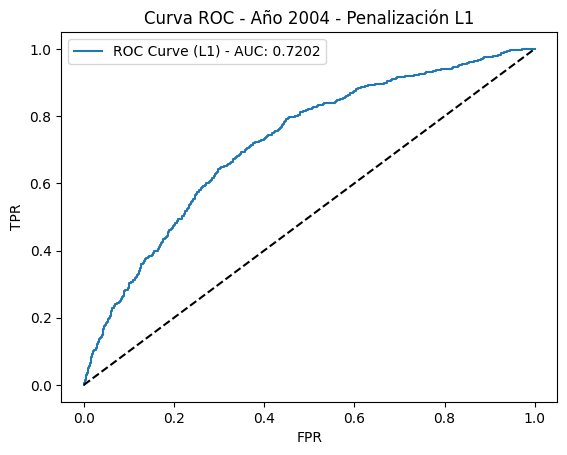


=== Año 2004 - Regularización L2 ===
Matriz de Confusión:
[[7864    0]
 [ 530    0]]
AUC: 0.7204
Accuracy: 0.9369


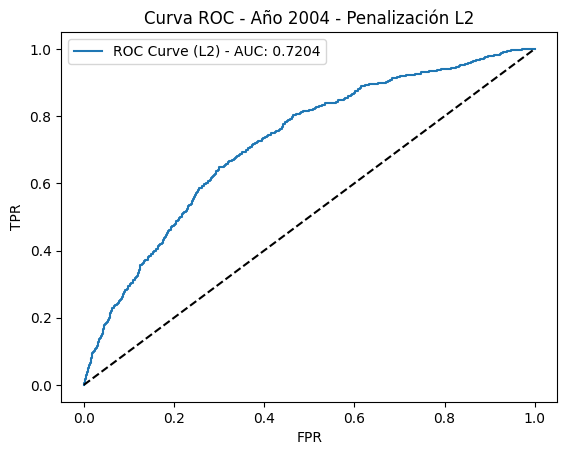


=== Año 2024 - Regularización L1 ===
Matriz de Confusión:
[[8262    0]
 [ 267    0]]
AUC: 0.6787
Accuracy: 0.9687


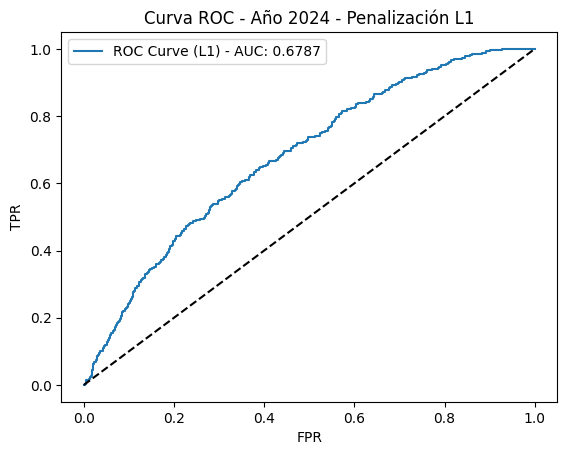


=== Año 2024 - Regularización L2 ===
Matriz de Confusión:
[[8262    0]
 [ 267    0]]
AUC: 0.6401
Accuracy: 0.9687


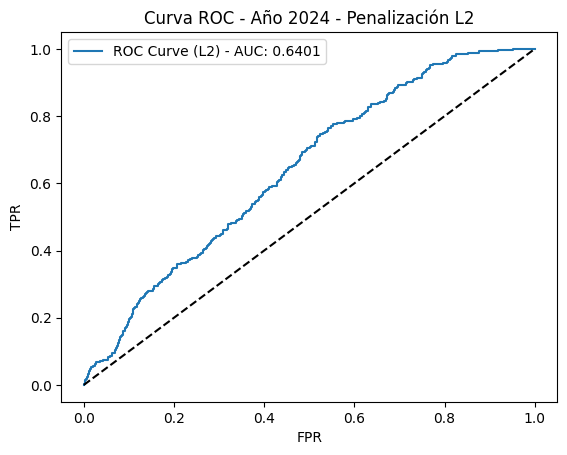

In [ ]:
# Importar librerías
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Función para entrenar y evaluar regresión logística con penalización
def evaluar_logistica(X_train, y_train, X_test, y_test, penalty_type, year):
    print(f"\n=== Año {year} - Regularización {penalty_type.upper()} ===")

    # Inicializar el modelo de regresión logística
    modelo = LogisticRegression(penalty=penalty_type, C=1.0, solver='liblinear', random_state=101)

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Evaluar matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:")
    print(matriz_confusion)

    # Calcular métricas
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"AUC: {auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"ROC Curve ({penalty_type.upper()}) - AUC: {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC - Año {year} - Penalización {penalty_type.upper()}")
    plt.legend()
    plt.show()


from sklearn.model_selection import cross_val_score

#scores = cross_val_score(
#    LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', C=1),
#    X_2004, y_2004, cv=5, scoring='f1'
#)
#print("F1-Score en Validación Cruzada:", scores)


# Evaluación para Año 2004
evaluar_logistica(X_train_2004, y_train_2004, X_test_2004, y_test_2004, "l1", 2004)
evaluar_logistica(X_train_2004, y_train_2004, X_test_2004, y_test_2004, "l2", 2004)

# Evaluación para Año 2024
evaluar_logistica(X_train_2024, y_train_2024, X_test_2024, y_test_2024, "l1", 2024)
evaluar_logistica(X_train_2024, y_train_2024, X_test_2024, y_test_2024, "l2", 2024)


##	5. Realicen un barrido en \lambda = 10n con n ∈ {−5, −4, −3 ..., +4, +5} y utilicen 10-fold CV para elegir el \lambda óptimo en regresión logística con Ridge y con LASSO. ¿Qué \lambda seleccionó en cada caso? Usando la librería de seaborn, generen box plot mostrando la distribución del error de predicción para cada \lambda. Cada box debe corresponder a un valor de \lambda y contener como observaciones el error medio de validación (MSE) para cada partición. Además, para la regularización LASSO, generen un line plot del promedio de la proporción de variables ignoradas por el modelo en función de \lambda (como vieron en el tutorial 10), es decir la proporción de variables para las cuales el coeficiente asociado es cero.**  


=== Entrenando modelo LASSO ===
Mejor valor de \lambda: 0.0001
Error cuadrático medio en el conjunto de prueba: 0.0571
Proporción de coeficientes en 0: 0.2558

=== Entrenando modelo RIDGE ===
Mejor valor de \lambda: 100.0
Error cuadrático medio en el conjunto de prueba: 0.0571

=== Entrenando modelo LASSO ===
Mejor valor de \lambda: 0.0001
Error cuadrático medio en el conjunto de prueba: 0.0300
Proporción de coeficientes en 0: 0.4255

=== Entrenando modelo RIDGE ===


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.19601e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.00847e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.80972e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.80364e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

Mejor valor de \lambda: 1000.0
Error cuadrático medio en el conjunto de prueba: 0.0300


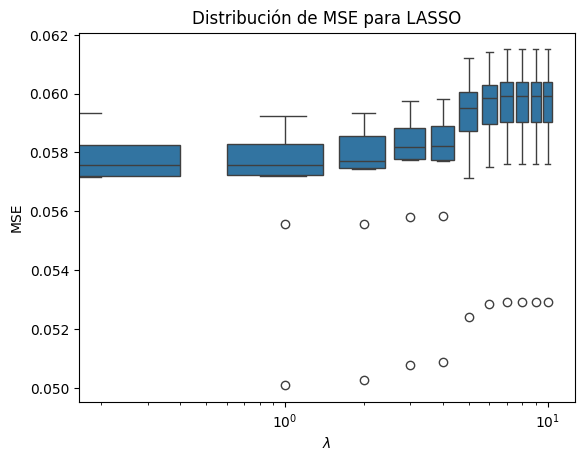

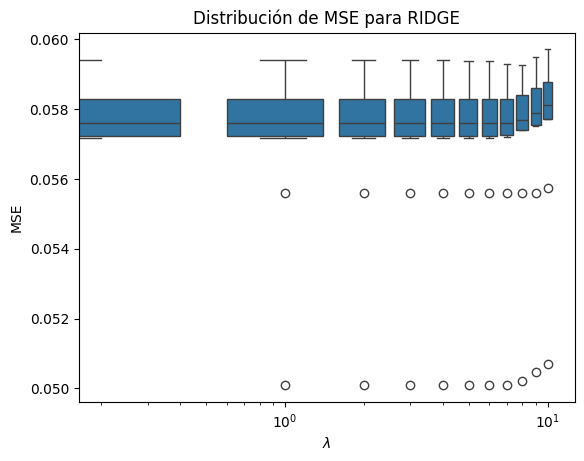

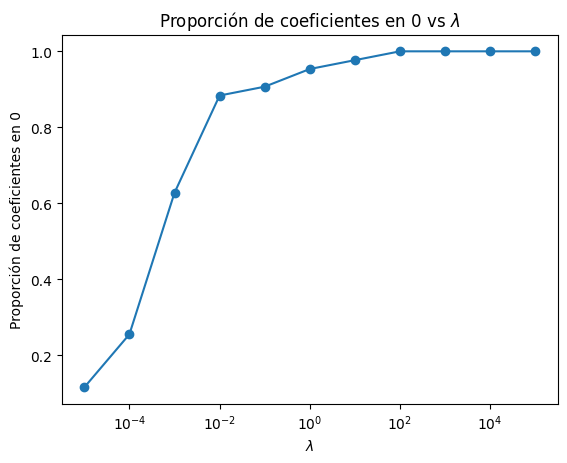

In [ ]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score


# Definir rango de \lambda
lambdas = np.logspace(-5, 5, 11)  # 10^n para n en {-5, ..., +5}

# Función para entrenar y evaluar LASSO y Ridge
def entrenar_modelo(X_train, y_train, X_test, y_test, modelo_tipo):
    print(f"\n=== Entrenando modelo {modelo_tipo.upper()} ===")

    if modelo_tipo == "lasso":
        modelo = LassoCV(alphas=lambdas, cv=10, random_state=101, max_iter=10000)
    elif modelo_tipo == "ridge":
        modelo = RidgeCV(alphas=lambdas, cv=10)

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Obtener el mejor valor de \lambda
    mejor_lambda = modelo.alpha_
    print(f"Mejor valor de \lambda: {mejor_lambda}")

    # Predicción en el conjunto de prueba
    y_pred_test = modelo.predict(X_test)

    # Calcular el error cuadrático medio
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Error cuadrático medio en el conjunto de prueba: {mse_test:.4f}")

    if modelo_tipo == "lasso":
        # Proporción de coeficientes en 0
        proporción_ceros = np.mean(modelo.coef_ == 0)
        print(f"Proporción de coeficientes en 0: {proporción_ceros:.4f}")

        return modelo, mejor_lambda, proporción_ceros
    return modelo, mejor_lambda

# Entrenar LASSO y Ridge para 2004
modelo_lasso_2004, lambda_lasso_2004, proporción_ceros_2004 = entrenar_modelo(X_train_2004, y_train_2004, X_test_2004, y_test_2004, "lasso")
modelo_ridge_2004, lambda_ridge_2004 = entrenar_modelo(X_train_2004, y_train_2004, X_test_2004, y_test_2004, "ridge")

# Entrenar LASSO y Ridge para 2024
modelo_lasso_2024, lambda_lasso_2024, proporción_ceros_2024 = entrenar_modelo(X_train_2024, y_train_2024, X_test_2024, y_test_2024, "lasso")
modelo_ridge_2024, lambda_ridge_2024 = entrenar_modelo(X_train_2024, y_train_2024, X_test_2024, y_test_2024, "ridge")

# Generar box plots para errores
def generar_boxplot_errores(X, y, modelo_tipo):
    errores = []
    for alpha in lambdas:
        if modelo_tipo == "lasso":
            modelo = LassoCV(alphas=[alpha], cv=10, random_state=101, max_iter=10000)
        elif modelo_tipo == "ridge":
            modelo = RidgeCV(alphas=[alpha], cv=10)
        scores = cross_val_score(modelo, X, y, cv=10, scoring="neg_mean_squared_error")
        errores.append(-scores)

    errores_df = pd.DataFrame(errores, index=lambdas).T.melt(var_name="Lambda", value_name="MSE")
    sns.boxplot(x="Lambda", y="MSE", data=errores_df)
    plt.xscale("log")
    plt.title(f"Distribución de MSE para {modelo_tipo.upper()}")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("MSE")
    plt.show()

# Box plot para LASSO y Ridge (2004)
generar_boxplot_errores(X_train_2004, y_train_2004, "lasso")
generar_boxplot_errores(X_train_2004, y_train_2004, "ridge")

# Proporción de coeficientes en cero (LASSO)
def plot_proporción_ceros(modelo, X, lambdas):
    proporciones = []
    for alpha in lambdas:
        lasso = LassoCV(alphas=[alpha], cv=10, random_state=101, max_iter=10000)
        lasso.fit(X, y_train_2004)
        proporciones.append(np.mean(lasso.coef_ == 0))
    plt.plot(lambdas, proporciones, marker="o")
    plt.xscale("log")
    plt.title("Proporción de coeficientes en 0 vs $\lambda$")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("Proporción de coeficientes en 0")
    plt.show()

plot_proporción_ceros(modelo_lasso_2004, X_train_2004, lambdas)


##6. En el caso del valor óptimo de \lambda para LASSO encontrado en el inciso anterior, ¿qué variables fueron descartadas? ¿Son las que hubieran esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de la Parte I? **

In [ ]:
# Importar bibliotecas necesarias
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Función para entrenar y evaluar LASSO
def entrenar_lasso_2004(X_train, y_train, X_test, y_test):
    print("\n=== Entrenando modelo LASSO ===")

    # Inicializar LASSO con validación cruzada para seleccionar alpha
    lasso = LassoCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5, random_state=101)

    # Entrenar el modelo
    lasso.fit(X_train, y_train)

    # Obtener el mejor valor de alpha
    mejor_alpha = lasso.alpha_
    print(f"Mejor valor de alpha (λ): {mejor_alpha}")

    # Predicción en el conjunto de prueba
    y_pred_test = lasso.predict(X_test)

    # Calcular el error cuadrático medio
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Error cuadrático medio en el conjunto de prueba: {mse_test:.4f}")

    # Obtener los coeficientes
    print("\nCoeficientes antes de LASSO para 2004:")
    print(X_train_2004.columns)
    coeficientes = pd.Series(lasso.coef_, index=X_train.columns)
    print("\nCoeficientes seleccionados por LASSO para 2024:")
    print(coeficientes[coeficientes != 0])  # Variables seleccionadas

    return lasso


# Importar bibliotecas necesarias
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Función para entrenar y evaluar LASSO
def entrenar_lasso_2024(X_train, y_train, X_test, y_test):
    print("\n=== Entrenando modelo LASSO ===")

    # Inicializar LASSO con validación cruzada para seleccionar alpha
    lasso = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5, random_state=101)

    # Entrenar el modelo
    lasso.fit(X_train, y_train)

    # Obtener el mejor valor de alpha
    mejor_alpha = lasso.alpha_
    print(f"Mejor valor de alpha (λ): {mejor_alpha}")

    # Predicción en el conjunto de prueba
    y_pred_test = lasso.predict(X_test)

    # Calcular el error cuadrático medio
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Error cuadrático medio en el conjunto de prueba: {mse_test:.4f}")

    # Obtener los coeficientes
    print("\nCoeficientes antes de LASSO para 2024:")
    print(X_train_2004.columns)
    coeficientes = pd.Series(lasso.coef_, index=X_train.columns)
    print("\nCoeficientes seleccionados por LASSO para 2024:")
    print(coeficientes[coeficientes != 0])  # Variables seleccionadas

    return lasso
# Ejecutar LASSO en el año 2004
modelo_lasso_2004 = entrenar_lasso_2004(X_train_2004, y_train_2004, X_test_2004, y_test_2004)

# Ejecutar LASSO en el año 2024
modelo_lasso_2024 = entrenar_lasso_2024(X_train_2024, y_train_2024, X_test_2024, y_test_2024)



=== Entrenando modelo LASSO ===
Mejor valor de alpha (λ): 0.01
Error cuadrático medio en el conjunto de prueba: 0.0577

Coeficientes antes de LASSO para 2004:
Index(['CH06', 'NIVEL_ED', 'IV6', 'IV11', 'ITF', 'IPCF', 'II1', 'IX_TOT',
       'CH04_Mujer', 'CH03_Cónyuge/Pareja', 'CH03_Hijo/Hijastro',
       'CH03_Yerno/Nuera', 'CH03_Nieto', 'CH03_Madre/Padre', 'CH03_Suegro',
       'CH03_Hermano', 'CH03_Otros familiares', 'CH03_No familiares',
       'II7_9.0', 'II7_Está en sucesión',
       'II7_Inquilino/arrendatario de la vivienda',
       'II7_Ocupante de hecho (sin permiso)',
       'II7_Ocupante en relación de dependencia',
       'II7_Ocupante gratuito (con permiso)',
       'II7_Ocupante por pago de impuestos/expensas',
       'II7_Propietario de la vivienda solamente',
       'II7_Propietario de la vivienda y el terreno', 'IV12_3_1.0',
       'IV12_3_2.0', 'II8_4.0', 'II8_9.0', 'II8_Gas de red',
       'II8_Gas de tubo/garrafa', 'II8_Kerosene/leña/carbón', 'REGION_40.0',
       

**Entrenar con variables seleccionadas por LASSO**

In [ ]:


# Importar bibliotecas necesarias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Crear una copia de las bases originales
base_2004_aux = base_2004.copy()
base_2024_aux = base_2024.copy()
#base_2024_aux.to_csv("base_2024_aux4_2.csv", index=False)

# Lista de variables relevantes seleccionadas por LASSO
variables_relevantes = ["CH06", "ITF", "IPCF", "PORC_DEP","YEAR"]

# Filtrar las bases para conservar únicamente las columnas seleccionadas por LASSO
base_2004_aux = base_2004_aux[variables_relevantes + ["ESTADO_Desocupado"]]
base_2024_aux = base_2024_aux[variables_relevantes + ["ESTADO_Desocupado"]]
# Identificar columnas booleanas
# Identificar columnas booleanas en base_2024_aux
columnas_booleanas = [col for col in base_2024_aux.columns if base_2024_aux[col].dtype == 'bool']

# Convertir las columnas booleanas a valores binarios (0 y 1)
base_2024_aux[columnas_booleanas] = base_2024_aux[columnas_booleanas].astype(int)

# Verificar el resultado
print(base_2024_aux[columnas_booleanas].head())


columnas_booleanas = [col for col in base_2004_aux.columns if base_2004_aux[col].dtype == 'bool']

# Convertir las columnas booleanas a valores binarios (0 y 1)
base_2004_aux[columnas_booleanas] = base_2004_aux[columnas_booleanas].astype(int)

# Verificar el resultado
print(base_2004_aux[columnas_booleanas].head())




# Paso 2: Separar en variables dependientes (y) e independientes (X)
# Eliminar 'DESOCUPADO' y 'YEAR' de las variables independientes
y_2004 = base_2004_aux['ESTADO_Desocupado']
X_2004 = base_2004_aux.drop(columns=['ESTADO_Desocupado', 'YEAR'])

y_2024 = base_2024_aux['ESTADO_Desocupado']
X_2024 = base_2024_aux.drop(columns=['ESTADO_Desocupado', 'YEAR'])

# Agregar columna de unos para el término constante (intercepto)
X_2004['INTERCEPT'] = 1
X_2024['INTERCEPT'] = 1
base_2004_aux.to_csv("base_2004_aux4_2.csv", index=False)

# Paso 3: Dividir en entrenamiento (70%) y prueba (30%) con semilla 101
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(
    X_2004, y_2004, test_size=0.2, stratify=y_2004, random_state=101
)

X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(
    X_2024, y_2024, test_size=0.2, stratify=y_2024, random_state=101
)



# Paso 4: Verificar resultados
print("=== Año 2004 ===")
print("Conjunto de entrenamiento (X_train):", X_train_2004.shape)
print("Conjunto de prueba (X_test):", X_test_2004.shape)
print("Variable dependiente entrenamiento (y_train):", y_train_2004.shape)
print("Variable dependiente prueba (y_test):", y_test_2004.shape)

print("\n=== Año 2024 ===")
print("Conjunto de entrenamiento (X_train):", X_train_2024.shape)
print("Conjunto de prueba (X_test):", X_test_2024.shape)
print("Variable dependiente entrenamiento (y_train):", y_train_2024.shape)
print("Variable dependiente prueba (y_test):", y_test_2024.shape)


   ESTADO_Desocupado
0                  0
1                  0
2                  0
3                  0
4                  0
   ESTADO_Desocupado
0                  0
1                  0
2                  0
3                  0
4                  0
=== Año 2004 ===
Conjunto de entrenamiento (X_train): (33572, 5)
Conjunto de prueba (X_test): (8394, 5)
Variable dependiente entrenamiento (y_train): (33572,)
Variable dependiente prueba (y_test): (8394,)

=== Año 2024 ===
Conjunto de entrenamiento (X_train): (34112, 5)
Conjunto de prueba (X_test): (8529, 5)
Variable dependiente entrenamiento (y_train): (34112,)
Variable dependiente prueba (y_test): (8529,)


**ROC Con variables seleccionaads por LASSO**


=== Año 2004 - Regularización L1 ===
Matriz de Confusión:
[[7864    0]
 [ 530    0]]
AUC: 0.6897
Accuracy: 0.9369


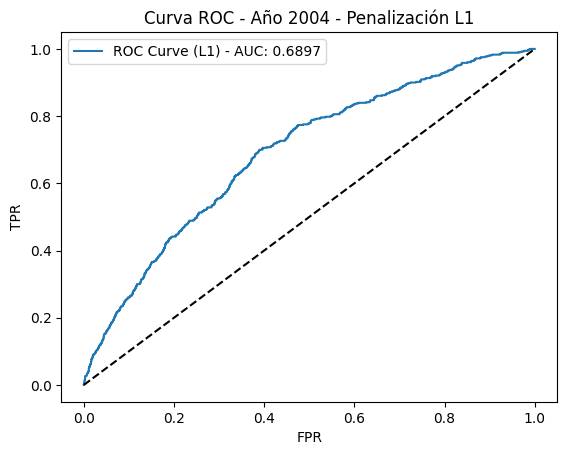


=== Año 2004 - Regularización L2 ===
Matriz de Confusión:
[[7864    0]
 [ 530    0]]
AUC: 0.6897
Accuracy: 0.9369


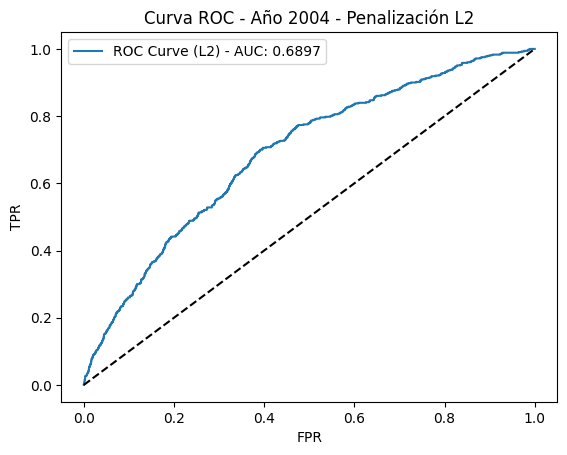


=== Año 2024 - Regularización L1 ===
Matriz de Confusión:
[[8262    0]
 [ 267    0]]
AUC: 0.6579
Accuracy: 0.9687


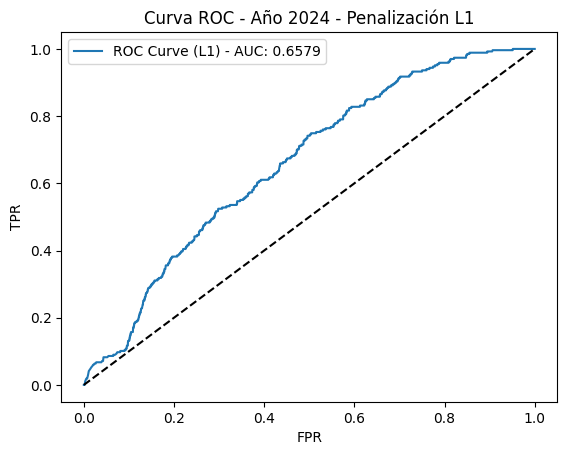


=== Año 2024 - Regularización L2 ===
Matriz de Confusión:
[[8262    0]
 [ 267    0]]
AUC: 0.6408
Accuracy: 0.9687


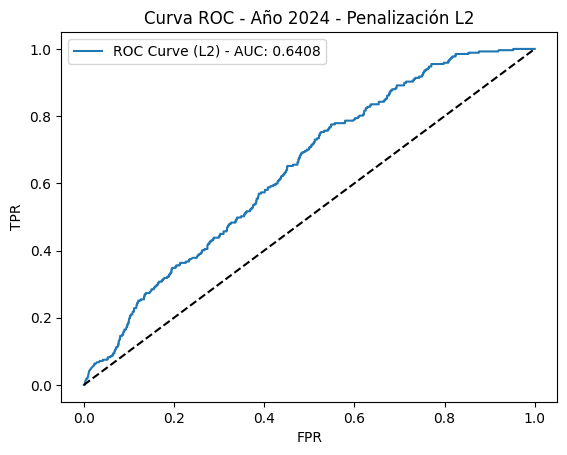

In [ ]:
# Importar librerías
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Función para entrenar y evaluar regresión logística con penalización
def evaluar_logistica(X_train, y_train, X_test, y_test, penalty_type, year):
    print(f"\n=== Año {year} - Regularización {penalty_type.upper()} ===")

    # Inicializar el modelo de regresión logística
    modelo = LogisticRegression(penalty=penalty_type, C=1.0, solver='liblinear', random_state=101)

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Evaluar matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:")
    print(matriz_confusion)

    # Calcular métricas
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"AUC: {auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"ROC Curve ({penalty_type.upper()}) - AUC: {auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC - Año {year} - Penalización {penalty_type.upper()}")
    plt.legend()
    plt.show()


from sklearn.model_selection import cross_val_score

#scores = cross_val_score(
#    LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', C=1),
#    X_2004, y_2004, cv=5, scoring='f1'
#)
#print("F1-Score en Validación Cruzada:", scores)


# Evaluación para Año 2004
evaluar_logistica(X_train_2004, y_train_2004, X_test_2004, y_test_2004, "l1", 2004)
evaluar_logistica(X_train_2004, y_train_2004, X_test_2004, y_test_2004, "l2", 2004)

# Evaluación para Año 2024
evaluar_logistica(X_train_2024, y_train_2024, X_test_2024, y_test_2024, "l1", 2024)
evaluar_logistica(X_train_2024, y_train_2024, X_test_2024, y_test_2024, "l2", 2024)

# 7. Lasso Vs Ridge
## Mejor MSE

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Normalizamos los datos
scaler = StandardScaler()

X_train_2004_scaled = scaler.fit_transform(X_train_2004)
X_train_2024_scaled = scaler.fit_transform(X_train_2024)

# Regularización LASSO (penalización L1)
lasso_model_2004 = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model_2024 = LogisticRegression(penalty='l1', solver='liblinear')

# Ajustamos los modelos
lasso_model_2004.fit(X_train_2004_scaled, y_train_2004)
lasso_model_2024.fit(X_train_2024_scaled, y_train_2024)

# Predicciones
y_pred_2004_lasso = lasso_model_2004.predict(X_train_2004_scaled)
y_pred_2024_lasso = lasso_model_2024.predict(X_train_2024_scaled)

# Calculamos el MSE para LASSO
mse_2004_lasso = mean_squared_error(y_train_2004, y_pred_2004_lasso)
mse_2024_lasso = mean_squared_error(y_train_2024, y_pred_2024_lasso)

# Regularización Ridge (penalización L2)
ridge_model_2004 = LogisticRegression(penalty='l2', solver='liblinear')
ridge_model_2024 = LogisticRegression(penalty='l2', solver='liblinear')

# Ajustamos los modelos
ridge_model_2004.fit(X_train_2004_scaled, y_train_2004)
ridge_model_2024.fit(X_train_2024_scaled, y_train_2024)

# Predicciones
y_pred_2004_ridge = ridge_model_2004.predict(X_train_2004_scaled)
y_pred_2024_ridge = ridge_model_2024.predict(X_train_2024_scaled)

# Calculamos el MSE para Ridge
mse_2004_ridge = mean_squared_error(y_train_2004, y_pred_2004_ridge)
mse_2024_ridge = mean_squared_error(y_train_2024, y_pred_2024_ridge)

# DataFrame para mostrar los resultados
results_df = pd.DataFrame({
    'Modelo': ['LASSO 2004', 'LASSO 2024', 'Ridge 2004', 'Ridge 2024'],
    'MSE': [mse_2004_lasso, mse_2024_lasso, mse_2004_ridge, mse_2024_ridge]
})


# Mostrar el cuadro con las variables seleccionadas
import IPython.display as display

display.display(results_df)

,Modelo,MSE
0,LASSO 2004,0.063178
1,LASSO 2024,0.031250
2,Ridge 2004,0.063178
3,Ridge 2024,0.031250
